In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,root_mean_squared_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [32]:
df=pd.read_csv('heart.csv')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

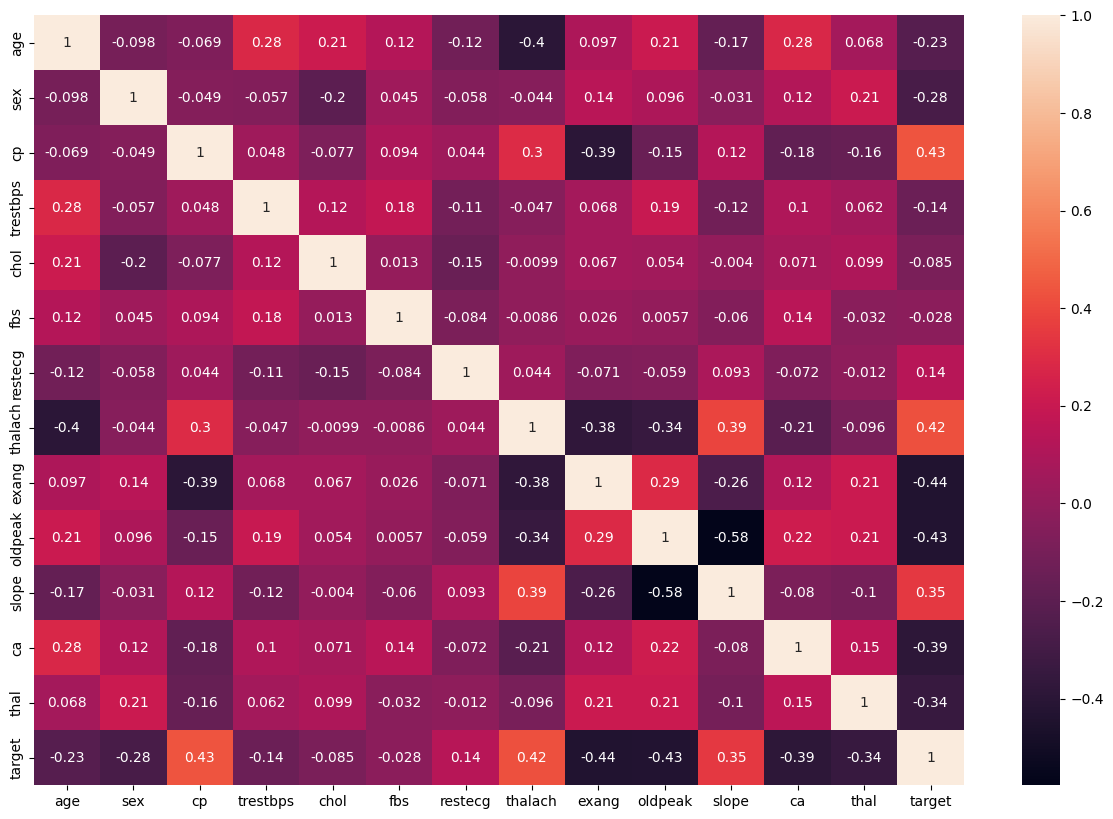

In [35]:
a=df.corr(numeric_only= True)
plt.figure(figsize=(15,10))
sns.heatmap(a,annot=True)

In [36]:
x=df.drop(columns='target')
y=df['target']

# Before scaling 

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)
train_acc=model.score(x_train,y_train)

In [40]:
y_pred=model.predict(x_test)
test_acc=model.score(x_test,y_test)

In [41]:
print('train accuracy',train_acc)
print('test accuracy',test_acc)

train accuracy 0.5077512865986449
test accuracy 0.5337894947682487


In [42]:
rmse=root_mean_squared_error(y_test,y_pred)

In [43]:
target_mean=y_test.mean()

In [44]:
mse_eval=rmse/target_mean
mse_eval

np.float64(0.650002515661497)

In [45]:
model.coef_

array([-0.00062752, -0.1935466 ,  0.10288355, -0.00208192, -0.00024992,
        0.02845524,  0.05171915,  0.00230438, -0.1696945 , -0.06264225,
        0.1057503 , -0.10996777, -0.1255391 ])

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
df['restecg'].value_counts().sort_index()

restecg
0    147
1    152
2      4
Name: count, dtype: int64

In [48]:
df['slope'].value_counts().sort_index()

slope
0     21
1    140
2    142
Name: count, dtype: int64

In [49]:
df['thal'].value_counts().sort_index()

thal
0      2
1     18
2    166
3    117
Name: count, dtype: int64

In [50]:
colms=['age', 'trestbps','chol',  'thalach',
    'oldpeak', 'ca', 'thal']

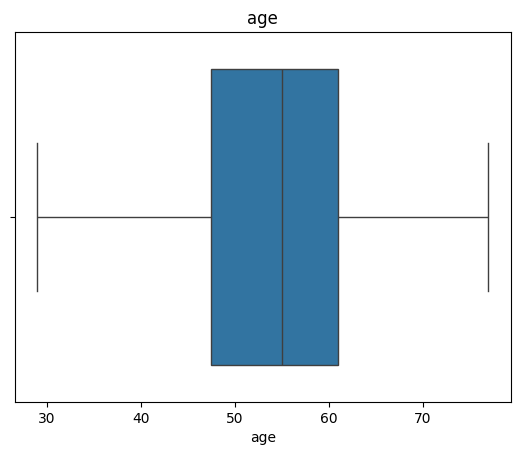

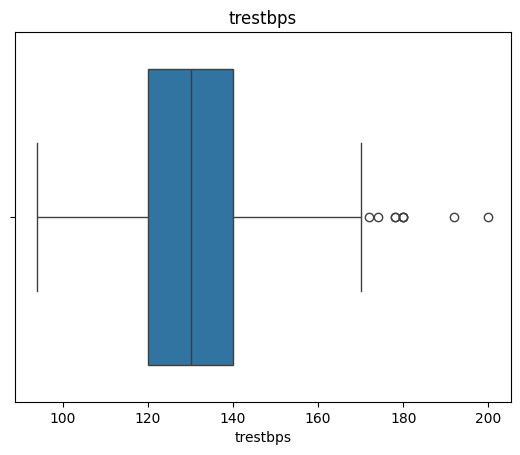

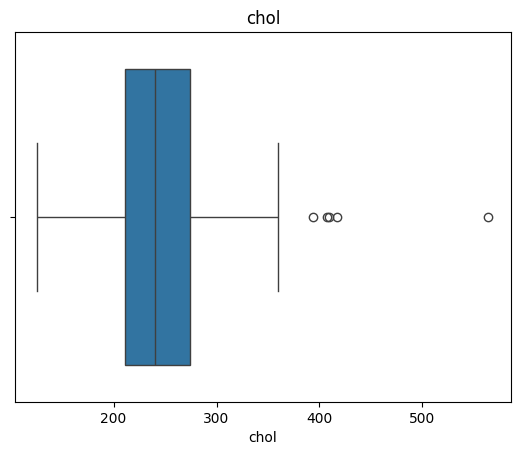

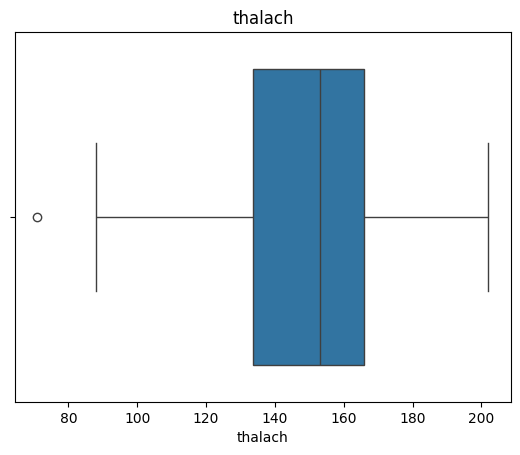

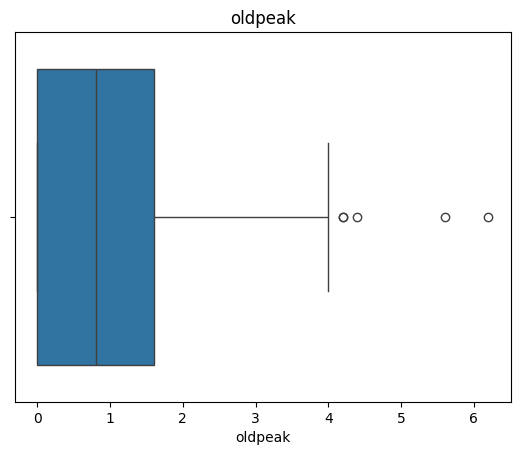

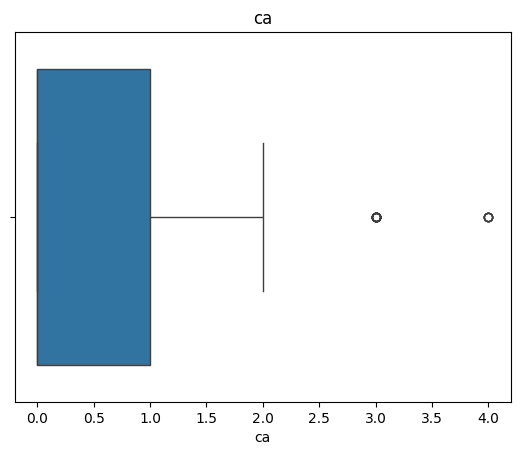

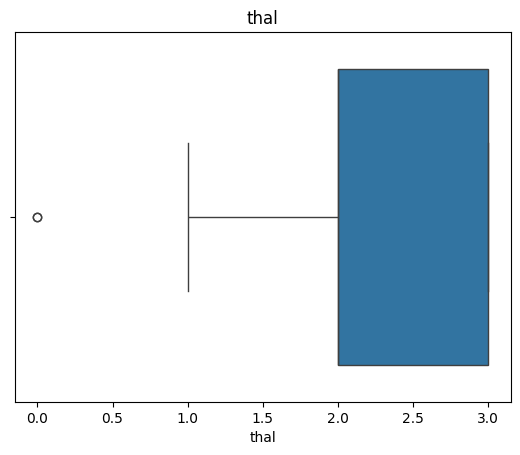

In [51]:
for col in colms:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

# After using standard scaler

In [52]:
scaler=StandardScaler()

In [53]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [54]:
scaled_model=LinearRegression()

In [55]:
scaled_model.fit(x_train_scaled,y_train)
y_pred_scled=scaled_model.predict(x_test_scaled)

In [56]:
scaled_train_acc=scaled_model.score(x_train_scaled,y_train)
scaled_test_acc=scaled_model.score(x_test_scaled,y_test)
print('train accuarcy',scaled_train_acc)
print('test accuracy',scaled_test_acc)

train accuarcy 0.5077512865986449
test accuracy 0.5337894947682487


In [57]:
rmse=root_mean_squared_error(y_test,y_pred_scled)

In [58]:
mse_value=rmse/y_test.mean()
print('rmse value',mse_eval)

rmse value 0.650002515661497


In [59]:
scaled_coeff=scaled_model.coef_
coeff=model.coef_

In [60]:
print('weights without standardized',coeff)
print('weights after standardized',scaled_coeff)

weights without standardized [-0.00062752 -0.1935466   0.10288355 -0.00208192 -0.00024992  0.02845524
  0.05171915  0.00230438 -0.1696945  -0.06264225  0.1057503  -0.10996777
 -0.1255391 ]
weights after standardized [-0.00576403 -0.09187721  0.10498428 -0.03496393 -0.01316758  0.00950975
  0.02737561  0.05140181 -0.07876136 -0.06892502  0.06413411 -0.10871095
 -0.0743923 ]


age

Age of the patient (in years)

2. sex

Gender of the patient

1 = Male

0 = Female

3. cp — Chest Pain Type

Chest pain type experienced by the patient:

0 = Typical angina

1 = Atypical angina

2 = Non-anginal pain

3 = Asymptomatic

4. trestbps — Resting Blood Pressure

Resting blood pressure (in mm Hg)

5. chol — Serum Cholesterol

Serum cholesterol level (mg/dl)

6. fbs — Fasting Blood Sugar

Fasting blood sugar > 120 mg/dl

1 = True

0 = False

7. restecg — Resting ECG Results

Resting electrocardiographic results:

0 = Normal

1 = ST-T wave abnormality

2 = Left ventricular hypertrophy

8. thalach — Maximum Heart Rate Achieved

Maximum heart rate achieved during exercise

9. exang — Exercise-Induced Angina

1 = Yes

0 = No

10. oldpeak — ST Depression

ST depression induced by exercise relative to rest
(Shows heart stress level)

11. slope — Slope of Peak Exercise ST segment

0 = Upsloping

1 = Flat

2 = Downsloping

12. ca — Number of Major Vessels Colored

Ranges from 0 to 4
(Fluoroscopy shows how many major vessels are blocked)

13. thal — Thalassemia Test Result

1 = Normal

2 = Fixed defect

3 = Reversible defect

14. target — Heart Disease Status

1 = Disease present

0 = No disease